Adjusting the default font sizes and parameters of matplotlib

In [1]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
 'ytick.labelsize': 18,
 'axes.titlesize' : 22,
 'axes.labelsize' : 20,
 'legend.fontsize': 18,
 'legend.title_fontsize': 22,
 'figure.titlesize': 24 }
pylab.rcParams.update(params)

In [2]:
import pyarrow as pa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

## **Part 1**


## **Q1** loading the dataset into pandas Dataframe

In [3]:
filename = 'virus_data.csv'

In [4]:
dataset = pd.read_csv(filename)

In [5]:
dataset.shape

(1250, 26)

## **Q2** Print the value_counts of the conversations_per_day feature

In [6]:
print(dataset['conversations_per_day'].value_counts())

conversations_per_day
3     224
2     215
4     190
5     156
6     111
1     104
8      72
7      60
9      39
10     23
11     19
12     12
13      9
14      6
17      4
15      2
16      2
19      1
22      1
Name: count, dtype: int64


## **Q3** write a table describing each feature.

In [7]:
print(dataset.columns)

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'symptoms',
       'pcr_date', 'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06',
       'PCR_07', 'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk'],
      dtype='object')


## **Q4** Split the dataset into a training set and a test set

In [8]:
from sklearn.model_selection import train_test_split
#split the data to 80% train, 20% test data
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=57+89)


## **Part 2**

## **Q5** Relation Between spread and PCR_01/PCR_03

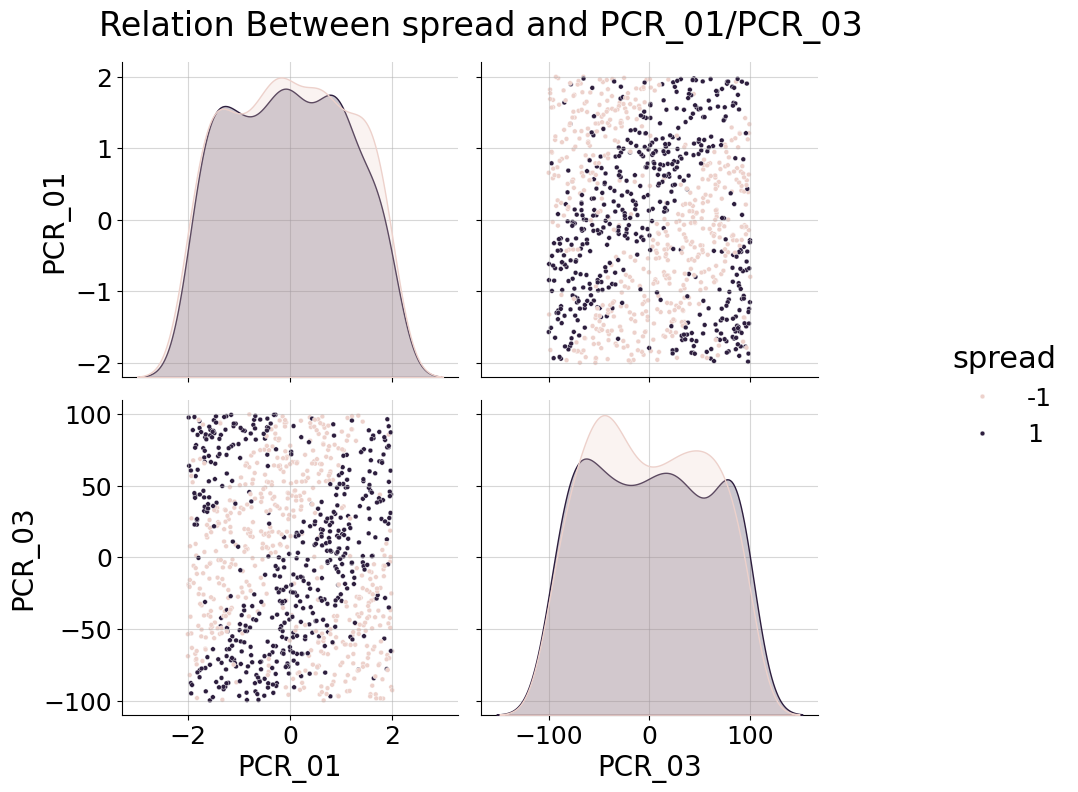

In [9]:
g = sns.pairplot(train_set, x_vars=['PCR_01', 'PCR_03'], y_vars=['PCR_01', 'PCR_03'], hue='spread', plot_kws={'s': 12})
g.figure.suptitle('Relation Between spread and PCR_01/PCR_03', y=1.04)

for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)
g.figure.set_size_inches(12,8)

## **Q6** Compute the correlation between spread and each of PCR_01 and PCR_03

In [10]:
#Q6 Compute correlation
print("Correlation between spread and PCR_01 is: {:.3f}".format(train_set.corr(numeric_only=True).spread.PCR_01))
print("Correlation between spread and PCR_03 is: {:.3f}".format(train_set.corr(numeric_only=True).spread.PCR_03))


Correlation between spread and PCR_01 is: -0.011
Correlation between spread and PCR_03 is: 0.015


## **Q7** k-NN implementation

In [11]:
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial import distance

class kNN(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors:int = 3):
        self.n_neighbors = n_neighbors
        self.X = None
        self.y = None

    def fit(self, X, y):
        self.X = np.copy(X)
        self.y = np.copy(y)
        return self

    def predict(self, X):
        distances = distance.cdist(X, self.X, 'euclidean')
        k_nearest = np.argpartition(distances, self.n_neighbors)[:, :self.n_neighbors]
        predictions = np.sign(np.mean(self.y[k_nearest], axis=1))
        return predictions


## **Q8** Testing the k-NN implementation

the provided visualize_clf

In [12]:
def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()


testing the model with neighbors = 1 and only the pcr_01 and pcr_03 features

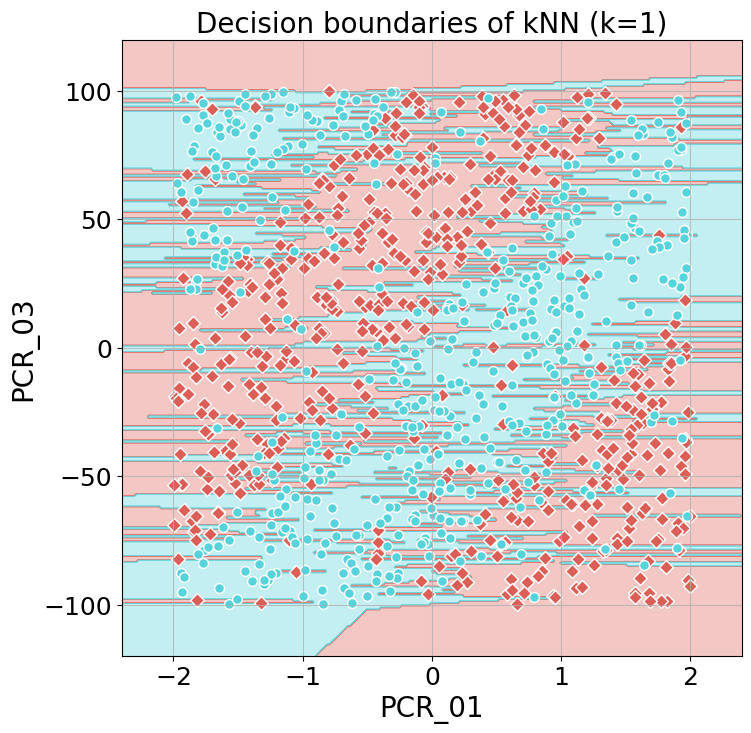

train accuracy: 1.0
test accuracy: 0.664


In [15]:
X_train_tmp = train_set[['PCR_01', 'PCR_03']]
y_train_tmp = train_set.spread
X_test_tmp = test_set[['PCR_01', 'PCR_03']]
y_test_tmp = test_set.spread

clf = kNN(n_neighbors=1)
clf.fit(X_train_tmp, y_train_tmp)
visualize_clf(clf, X_train_tmp, y_train_tmp, "Decision boundaries of kNN (k=1)", "PCR_01", "PCR_03")
print("train accuracy:", clf.score(X_train_tmp, y_train_tmp))
print("test accuracy:", clf.score(X_test_tmp, y_test_tmp))

Checking that all labels are ±1

In [16]:
print(y_train_tmp)
print(y_test_tmp)

1190   -1
622     1
1104    1
557     1
447    -1
       ..
969    -1
796    -1
766     1
866    -1
411    -1
Name: spread, Length: 1000, dtype: int64
1110    1
550    -1
598    -1
1076   -1
615     1
       ..
117     1
244     1
224    -1
595     1
417    -1
Name: spread, Length: 250, dtype: int64


## **Q9** Testing k-NN with normalized features (Min-Max)

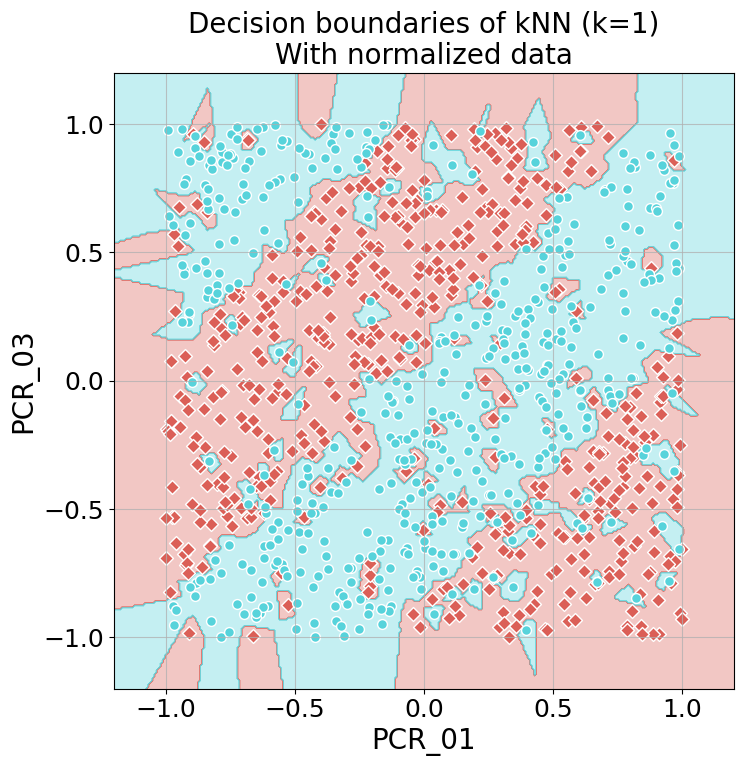

train accuracy: 1.0
test accuracy: 0.8


In [38]:
scaler = sk.preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X_train_tmp)
clf.fit(scaler.transform(X_train_tmp), y_train_tmp)
visualize_clf(clf, scaler.transform(X_train_tmp), y_train_tmp, "Decision boundaries of kNN (k=1)\nWith normalized data", "PCR_01", "PCR_03")
print("train accuracy:", clf.score(scaler.transform(X_train_tmp), y_train_tmp))
print("test accuracy:", clf.score(scaler.transform(X_test_tmp), y_test_tmp))

## **Q10** Comparing the model performance using k = 1 and k = 5